# Support Vector Machines

## Support Vector Classifier

In [1]:
from ml.svm import SVC
from sklearn.svm import SVC as SKLSVC
from sklearn.model_selection import train_test_split

### Linear Kernel

In [2]:
from ml.kernels import linear_kernel

#### Hard Margin

custom svc accuracy score is 1.0
custom svc found 3 support vectors from 150 examples
custom svc w is [-2.22840188  2.87368635]
custom svc b is -1.0842989075287834


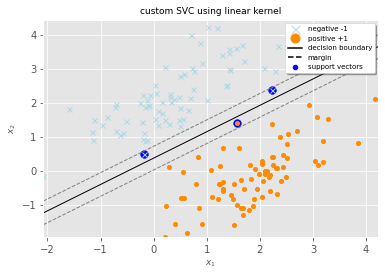

sklearn svc accuracy score is 1.0
sklearn svc found 3 support vectors from 150 examples
sklearn svc w is [[-2.22840221  2.87368603]]
sklearn svc b is [-0.85842662]


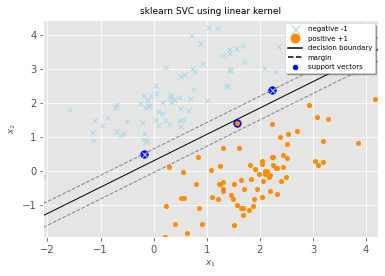

In [3]:
from utils import generate_linearly_separable_data

X, y = generate_linearly_separable_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svc = SVC(kernel=linear_kernel, C=10).fit(X_train, y_train)
print(f'custom svc accuracy score is {svc.score(X_test, y_test)}')
print(f'custom svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'custom svc w is {svc.coef_}')
print(f'custom svc b is {svc.intercept_}')
SVC.plot(svc, X_train, y_train)

svc = SKLSVC(kernel='linear', C=10).fit(X_train, y_train)
print(f'sklearn svc accuracy score is {svc.score(X_test, y_test)}')
print(f'sklearn svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svc w is {svc.coef_}')
print(f'sklearn svc b is {svc.intercept_}')
SVC.plot(svc, X_train, y_train)

#### Soft Margin

custom svc accuracy score is 0.96
custom svc found 12 support vectors from 150 examples
custom svc w is [-1.69585175  1.48695583]
custom svc b is 0.10433818528262877


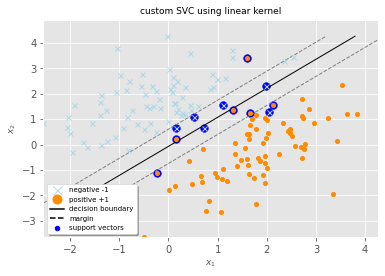

sklearn svc accuracy score is 0.96
sklearn svc found 12 support vectors from 150 examples
sklearn svc w is [[-1.69521462  1.4867308 ]]
sklearn svc b is [0.2612074]


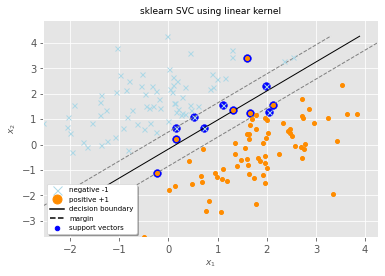

In [4]:
from utils import generate_linearly_separable_overlap_data

X, y = generate_linearly_separable_overlap_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svc = SVC(kernel=linear_kernel, C=100).fit(X_train, y_train)
print(f'custom svc accuracy score is {svc.score(X_test, y_test)}')
print(f'custom svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'custom svc w is {svc.coef_}')
print(f'custom svc b is {svc.intercept_}')
SVC.plot(svc, X_train, y_train)

svc = SKLSVC(kernel='linear', C=100).fit(X_train, y_train)
print(f'sklearn svc accuracy score is {svc.score(X_test, y_test)}')
print(f'sklearn svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svc w is {svc.coef_}')
print(f'sklearn svc b is {svc.intercept_}')
SVC.plot(svc, X_train, y_train)

### Polynomial Kernel

custom svc accuracy score is 1.0
custom svc found 9 support vectors from 150 examples
custom svc b is -0.3021283672509869


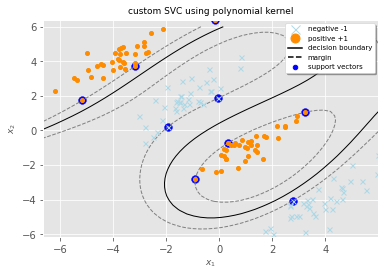

sklearn svc accuracy score is 1.0
sklearn svc found 9 support vectors from 150 examples
sklearn svc b is [-0.30185986]


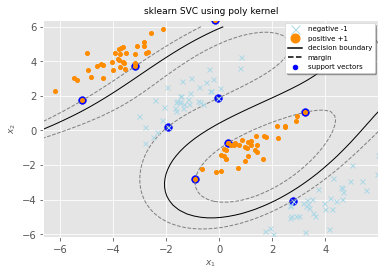

In [8]:
from utils import generate_non_linearly_separable_data
from ml.kernels import polynomial_kernel

X, y = generate_non_linearly_separable_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svc = SVC(kernel=polynomial_kernel, degree=3., coef0=3, gamma='auto').fit(X_train, y_train)
print(f'custom svc accuracy score is {svc.score(X_test, y_test)}')
print(f'custom svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'custom svc b is {svc.intercept_}')
SVC.plot(svc, X_train, y_train)

svc = SKLSVC(kernel='poly', degree=3., coef0=3., gamma='auto').fit(X_train, y_train)
print(f'sklearn svc accuracy score is {svc.score(X_test, y_test)}')
print(f'sklearn svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svc b is {svc.intercept_}')
SVC.plot(svc, X_train, y_train)

### RBF Kernel

custom svc accuracy score is 1.0
custom svc found 34 support vectors from 150 examples
custom svc b is -0.09048041788007674


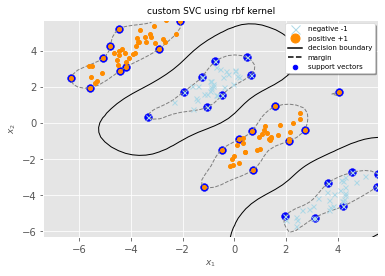

sklearn svc accuracy score is 1.0
sklearn svc found 34 support vectors from 150 examples
sklearn svc b is [-0.0906894]


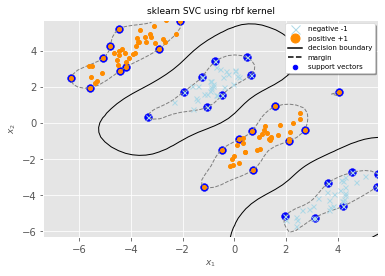

In [6]:
from utils import generate_non_linearly_separable_data
from ml.kernels import rbf_kernel

X, y = generate_non_linearly_separable_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svc = SVC(kernel=rbf_kernel, gamma='auto').fit(X_train, y_train)
print(f'custom svc accuracy score is {svc.score(X_test, y_test)}')
print(f'custom svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'custom svc b is {svc.intercept_}')
SVC.plot(svc, X_train, y_train)

svc = SKLSVC(kernel='rbf', gamma='auto').fit(X_train, y_train)
print(f'sklearn svc accuracy score is {svc.score(X_test, y_test)}')
print(f'sklearn svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svc b is {svc.intercept_}')
SVC.plot(svc, X_train, y_train)

## Support Vector Regression

In [1]:
from ml.svm import SVR
from sklearn.svm import SVR as SKLSVR
from sklearn.model_selection import train_test_split

custom svr r2 score is 0.6511782191680566
custom svr found 17 support vectors from 75 examples
custom svr b is 0.05750879072795726


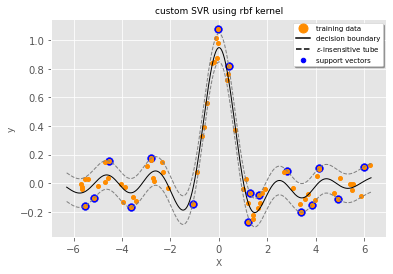

sklearn svr r2 score is 0.6509784907211283
sklearn svr found 17 support vectors from 75 examples
sklearn svr b is [0.05750722]


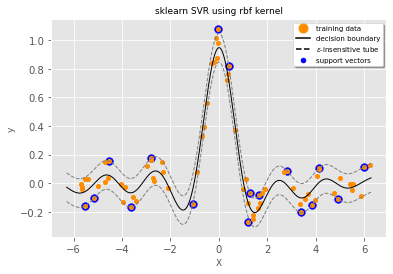

In [3]:
from utils import generate_non_linearly_regression_data
from ml.kernels import rbf_kernel

X, y = generate_non_linearly_regression_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svr = SVR(kernel=rbf_kernel, gamma='auto').fit(X_train, y_train)
print(f'custom svr r2 score is {svr.score(X_test, y_test)}')
print(f'custom svr found {len(svr.support_)} support vectors from {len(X_train)} examples')
print(f'custom svr b is {svr.intercept_}')
SVR.plot(svr, X_train, y_train)

svr = SKLSVR(kernel='rbf', gamma='auto').fit(X_train, y_train)
print(f'sklearn svr r2 score is {svr.score(X_test, y_test)}')
print(f'sklearn svr found {len(svr.support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svr b is {svr.intercept_}')
SVR.plot(svr, X_train, y_train)